In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)

def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

class KMeans:

    def __init__ (self, K, max_iters, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        for _ in range(self.max_iters):
            self.clusters = self.create_clusters(self.centroids)
            
            if self.plot_steps and _% math.ceil(self.max_iters / 50) == 0:
                print(f"Plot before {_+1} iteration")
                self.plot()

            old_centroids = self.centroids
            self.centroids = self.get_centroids(self.clusters)

            if self.is_converged(old_centroids, self.centroids):
                print(f"Converged after {_+1} iterations")
                break
            
            if self.plot_steps and _% math.ceil(self.max_iters / 50) == 0:
                print(f"Plot after {_+1} iteration")
                self.plot()

        return self.get_cluster_labels(self.clusters)
    
    def get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        
        return labels

    def create_clusters(self, centroids):
        clusters = [[] for  _ in range(self.K)]

        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)

        return clusters
    
    def closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def is_converged(self, old_centroids, centroids):
        distances = [euclidean_distance(old_centroids[i], centroids[i]) for i in range (self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(2*1.1, 1.5*1.1))

        for i, index in enumerate(self.clusters):
            points = np.array(self.X[index])
            ax.scatter(points[:, 0], points[:, 1])

        for point in self.centroids:
            ax.scatter(point[0], point[1], marker="x", color="black", linewidth=2)

        plt.show()

    def elbow_method(self, max_k):
        SSElist = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(K=k, max_iters=self.max_iters)
            print(f"For k = {k} ")
            kmeans.predict(self.X)
            sse = 0
            for cluster in kmeans.clusters:
                cluster_mean = np.mean(self.X[cluster], axis=0)
                for sample_idx in cluster:
                    sse += euclidean_distance(self.X[sample_idx], cluster_mean) ** 2
            print(f"SSE = {sse} \n")
            SSElist.append(sse)

        plt.plot(range(1, max_k + 1), SSElist, marker='o')
        plt.title('Elbow Method for Optimal K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('SSE')
        plt.show()

    def silhouette_method(self):
        silhouette_scores = []

        for i, cluster in enumerate(self.clusters):
            for sample_idx in cluster:
                a_i = np.mean([euclidean_distance(self.X[sample_idx], self.X[j]) for j in cluster])
                other_clusters = [c for idx, c in enumerate(self.clusters) if idx != i]
                b_i_values = [np.mean([euclidean_distance(self.X[sample_idx], self.X[j]) for j in other_cluster])
                              for other_cluster in other_clusters]
                b_i = min(b_i_values) if b_i_values else 0

                silhouette_score_i = (b_i - a_i) / max(a_i, b_i)
                silhouette_scores.append(silhouette_score_i)

        avg_silhouette_score = np.mean(silhouette_scores)
        print(f"Average Silhouette Score: {avg_silhouette_score}")

        plt.bar(range(self.n_samples), silhouette_scores)
        plt.title('Silhouette Scores for Each Data Point')
        plt.xlabel('Data Point Index')
        plt.ylabel('Silhouette Score')
        plt.show()

In [3]:
file_path = 'Kmean_dataset.csv'
df = pd.read_csv(file_path, dtype = 'float64')
X_train = df.iloc[:,:].values

X_train = mean_normal(X_train)

In [4]:
print("Shape of training set: ", X_train.shape)

Shape of training set:  (178, 13)


Plot before 1 iteration


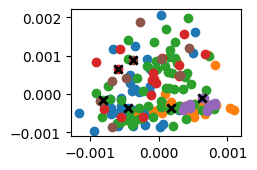

Plot after 1 iteration


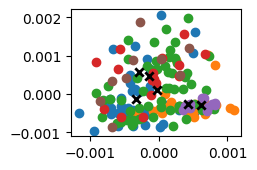

Plot before 5 iteration


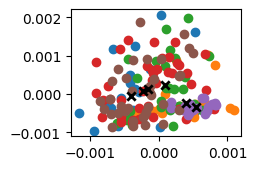

Plot after 5 iteration


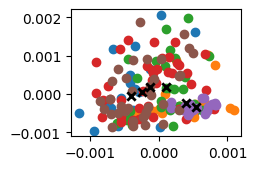

Plot before 9 iteration


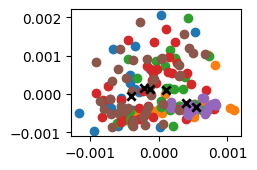

Converged after 9 iterations


In [5]:
k = KMeans(K = 6, max_iters = 200, plot_steps= True)
y_pred = k.predict(X_train)

The final plot is: 


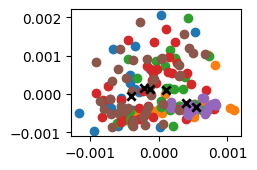

In [6]:
print("The final plot is: ")
k.plot()

For k = 1 
Converged after 2 iterations
SSE = 6.4917124869939595 

For k = 2 
Converged after 8 iterations
SSE = 1.6751434950622799 

For k = 3 
Converged after 10 iterations
SSE = 0.8721389076064751 

For k = 4 
Converged after 7 iterations
SSE = 0.49859867809336683 

For k = 5 
Converged after 19 iterations
SSE = 0.37167970091639174 

For k = 6 
Converged after 31 iterations
SSE = 0.23321041528350409 

For k = 7 
Converged after 19 iterations
SSE = 0.13632712758037063 

For k = 8 
Converged after 9 iterations
SSE = 0.10855139275779888 

For k = 9 
Converged after 6 iterations
SSE = 0.15658861603036767 

For k = 10 
Converged after 9 iterations
SSE = 0.1766921618136563 



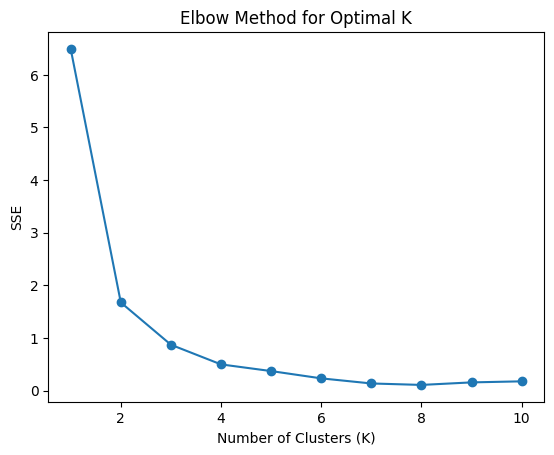

In [7]:
k.elbow_method(max_k=10)

Average Silhouette Score: 0.6001862977190237


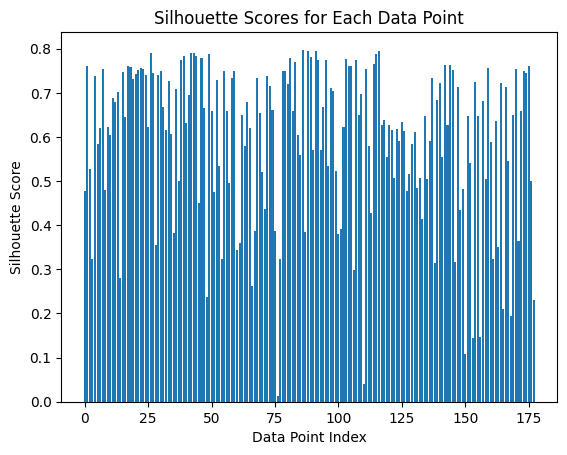

In [8]:
k.silhouette_method()

In [9]:
print(y_pred)

[1. 1. 1. 4. 2. 4. 4. 4. 1. 1. 4. 4. 4. 1. 4. 4. 4. 1. 4. 2. 2. 2. 1. 1.
 2. 2. 1. 4. 2. 1. 4. 4. 1. 4. 1. 2. 2. 1. 1. 2. 2. 1. 1. 3. 2. 1. 1. 1.
 1. 4. 1. 4. 1. 4. 1. 1. 1. 4. 4. 5. 3. 5. 3. 0. 0. 3. 5. 5. 2. 2. 2. 0.
 5. 1. 2. 0. 0. 5. 2. 5. 0. 3. 3. 5. 5. 5. 5. 5. 3. 3. 5. 5. 5. 0. 0. 1.
 3. 0. 3. 0. 3. 5. 5. 0. 3. 0. 5. 5. 0. 3. 5. 0. 3. 0. 0. 0. 5. 0. 0. 5.
 3. 5. 0. 0. 0. 0. 0. 5. 0. 5. 3. 5. 5. 3. 3. 3. 3. 5. 5. 3. 3. 2. 5. 5.
 2. 2. 0. 3. 3. 5. 5. 5. 5. 3. 3. 3. 5. 2. 3. 3. 5. 3. 3. 3. 3. 5. 3. 3.
 2. 3. 5. 5. 3. 2. 2. 2. 2. 5.]


In [10]:
output_data = {'Point No.': (i+1 for i in range(len(X_train))), 'Predicted Cluster': y_pred}

output_df = pd.DataFrame(output_data)

output_csv_path = 'K-Means Output.csv'
output_df.to_csv(output_csv_path, index=False)